## Basic Statistics on a Small Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([1, 5, 9, 7, 5, 3])

In [3]:
print("a mean : ", np.mean(a))

a mean :  5.0


In [4]:
print("a median : " , np.median(a))

a median :  5.0


In [5]:
print("a var : " , np.var(a))

a var :  6.666666666666667


In [6]:
print("a std : " , np.sqrt(a.var()))
print("a std : " , np.std(a))

a std :  2.581988897471611
a std :  2.581988897471611


## Probability Analysis of Dice Rolls

In [7]:
Dice = np.array([1, 2, 3, 4, 5, 6])

In [8]:
value , count = np.unique(Dice, return_counts=True)
print("value : ", value)
print("count : ", count)

value :  [1 2 3 4 5 6]
count :  [1 1 1 1 1 1]


In [9]:
pmf = count / count.sum()
print("pmf : ", pmf)

pmf :  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


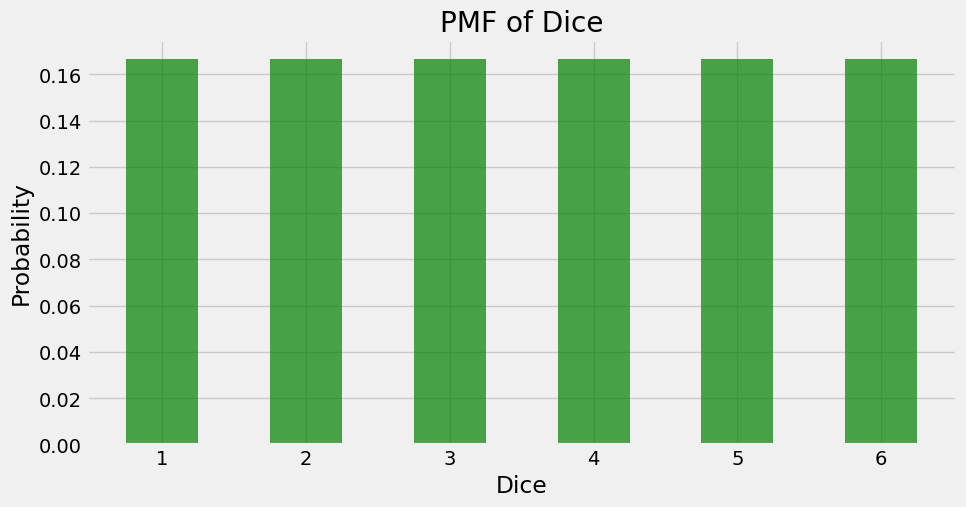

In [10]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 5))
    plt.bar(Dice, pmf , width=0.5, color='green', alpha=0.7)
    plt.xlabel("Dice")
    plt.ylabel("Probability")
    plt.title("PMF of Dice")
    plt.show()

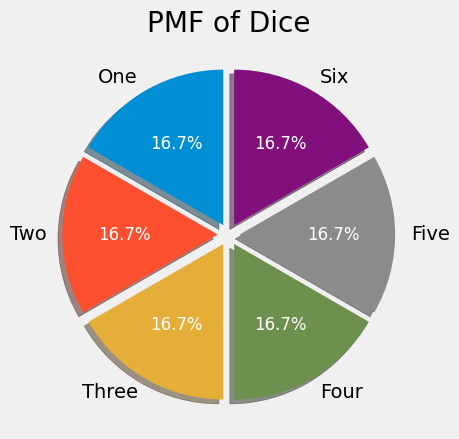

In [11]:
with plt.style.context('fivethirtyeight'):
    def make_autopct(pct):
        return f'{pct:.1f}%' if pct > 0 else ''
    
    wedges, texts, autotexts = plt.pie(
        pmf,
        labels=['One', 'Two', 'Three', 'Four', 'Five', 'Six'],
        startangle=90,
        shadow=True,
        explode=(0.07, 0.07, 0.07, 0.07, 0.07, 0.07),
        autopct=make_autopct
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)  

    plt.title("PMF of Dice")
    plt.show()


In [12]:
cdf = np.cumsum(pmf)
print("cdf : ", cdf)

cdf :  [0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


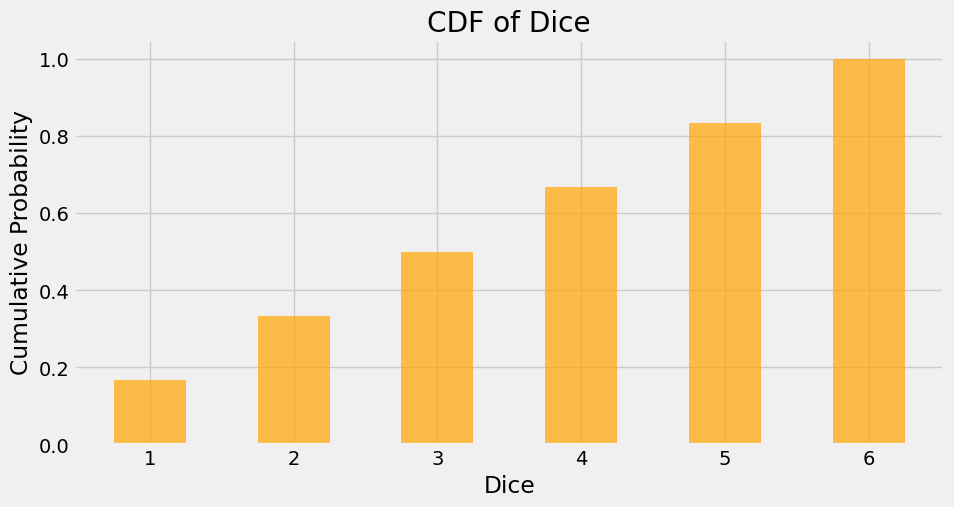

In [13]:
with plt.style.context('fivethirtyeight'):    
    plt.figure(figsize=(10, 5))
    plt.bar(Dice, cdf , width=0.5, color='orange', alpha=0.7)
    plt.xlabel("Dice")
    plt.ylabel("Cumulative Probability")
    plt.title("CDF of Dice")
    plt.show()

## Modeling Human Height with Normal Distribution

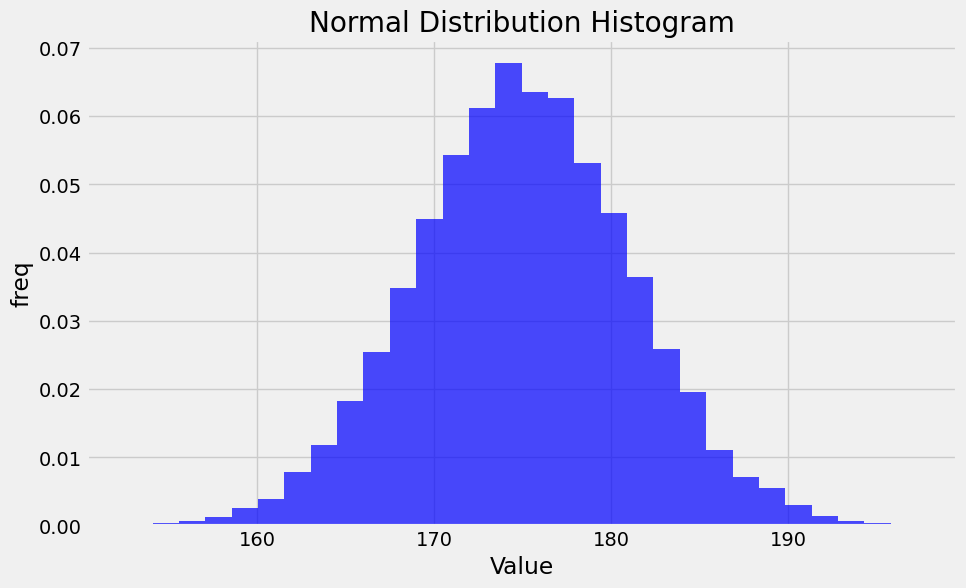

In [14]:
mean = 175
std_dev = 6
num_samples = 10000

data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.7, color='b')
    plt.title('Normal Distribution Histogram')
    plt.xlabel('Value')
    plt.ylabel('freq')
    plt.show()

## Poisson Modeling of Duststorms in Multan

In [15]:
from scipy.stats import poisson
from collections import Counter

lambda_val = 3.4
num_years = 10000
dataset = poisson.rvs(mu=lambda_val, size=num_years)

In [16]:
frequency = Counter(dataset)
print(frequency)
sorted_frequency = dict(sorted(frequency.items()))
print(sorted_frequency)

Counter({np.int64(3): 2133, np.int64(2): 1934, np.int64(4): 1849, np.int64(5): 1262, np.int64(1): 1185, np.int64(6): 738, np.int64(7): 364, np.int64(0): 314, np.int64(8): 146, np.int64(9): 52, np.int64(10): 19, np.int64(11): 3, np.int64(12): 1})
{np.int64(0): 314, np.int64(1): 1185, np.int64(2): 1934, np.int64(3): 2133, np.int64(4): 1849, np.int64(5): 1262, np.int64(6): 738, np.int64(7): 364, np.int64(8): 146, np.int64(9): 52, np.int64(10): 19, np.int64(11): 3, np.int64(12): 1}


In [17]:
x = list(sorted_frequency.keys())
y = list(sorted_frequency.values())

In [18]:
for storms, year_count in zip(x, y):
    print(f"{storms} storms: {year_count} years")

0 storms: 314 years
1 storms: 1185 years
2 storms: 1934 years
3 storms: 2133 years
4 storms: 1849 years
5 storms: 1262 years
6 storms: 738 years
7 storms: 364 years
8 storms: 146 years
9 storms: 52 years
10 storms: 19 years
11 storms: 3 years
12 storms: 1 years


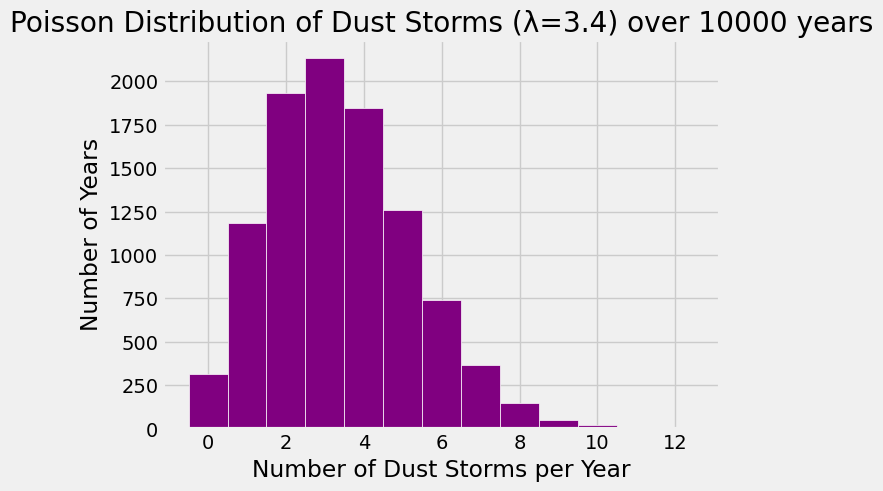

In [19]:
with plt.style.context('fivethirtyeight'):
    plt.bar(x, y, width=1, alpha = 1 , color='purple', edgecolor='White')
    plt.xlabel("Number of Dust Storms per Year")
    plt.ylabel("Number of Years")
    plt.title(f"Poisson Distribution of Dust Storms (λ={lambda_val}) over {num_years} years")
    plt.show()
